# DS4200 Assignment 4
Anjali Tanna


## Part 1 - Visualization Categorizations & Graphs in Python
________________________________________________

In [1]:
# Import necessary libraries
from joypy import joyplot
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import altair as alt
from IPython.display import Image

In [2]:
# Import data and clean 
# Data found on Kaggle.com
weather = pd.read_csv("mumbai_weather.csv")
weather.dropna()

,datetime,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,precipprob,preciptype
0,01-01-2016,28.4,11.9,37.8,1016.4,147.5,216.1,16.6,0,0
1,02-01-2016,26.8,13.0,44.8,1017.2,110.3,215.7,16.6,0,0
2,03-01-2016,25.5,14.6,52.8,1015.7,145.3,221.1,18.4,0,0
3,04-01-2016,26.4,13.1,46.6,1015.3,126.9,216.2,16.6,0,0
4,05-01-2016,27.1,13.5,44.9,1014.4,125.5,208.1,16.6,0,0
...,...,...,...,...,...,...,...,...,...,...
1776,11-11-2020,27.4,12.2,41.5,1011.8,108.3,220.4,17.2,0,0
1777,12-11-2020,28.0,13.0,40.9,1012.6,148.4,225.1,16.6,0,0
1778,13-11-2020,28.4,18.7,56.9,1011.9,131.8,223.4,18.4,0,0
1779,14-11-2020,29.5,20.9,61.3,1010.2,154.2,232.7,19.3,0,0


In [3]:
# Drop specific columns
mumbai = weather.drop(['sealevelpressure', 'winddir', 'solarradiation', 
                  'windspeed', 'precipprob', 'preciptype'], axis=1)

# Create 'month' column
mumbai['datetime'] = mumbai['datetime'].astype('datetime64')
mumbai['month'] = mumbai['datetime'].dt.month_name()

# Create 'year' column
mumbai['year'] = pd.to_datetime(mumbai['datetime']).dt.year 

mumbai.head()

,datetime,temp,dew,humidity,month,year
0,2016-01-01,28.4,11.9,37.8,January,2016
1,2016-02-01,26.8,13.0,44.8,February,2016
2,2016-03-01,25.5,14.6,52.8,March,2016
3,2016-04-01,26.4,13.1,46.6,April,2016
4,2016-05-01,27.1,13.5,44.9,May,2016


In [4]:
# Order the months
months = CategoricalDtype(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December'])

mumbai['month'] = mumbai['month'].astype(months)

In [5]:
# Set colors for ridges
colors = ['mediumpurple','mediumaquamarine', 'lightskyblue',
          'blue','violet','lightcyan','magenta','cyan','lightseagreen',
          'm', 'cornflowerblue', 'rebeccapurple']

### Ridgeline Plot of Average Temperature in Mumbai by Year

<Figure size 640x480 with 0 Axes>

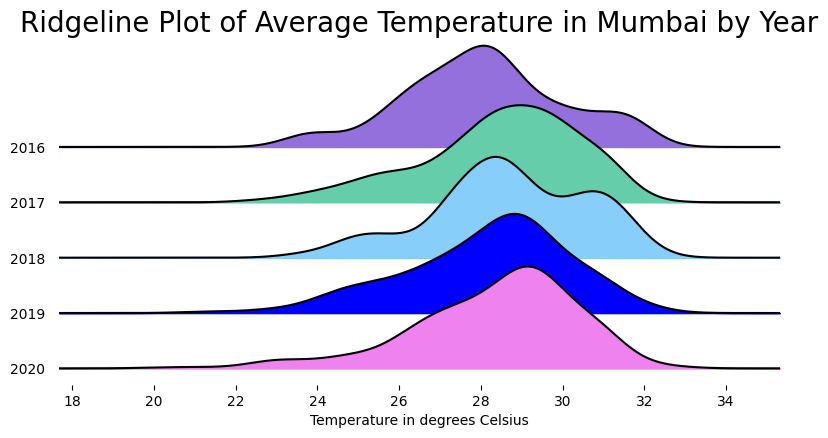

In [6]:
# Plot figure
plt.figure()

# Plot ridgeline
joyplot(data=mumbai[['temp', 'year']], by='year',
        figsize=(8, 4), color=colors)

# Add title and x-axis label
plt.title('Ridgeline Plot of Average Temperature in Mumbai by Year', fontsize=20)
plt.xlabel('Temperature in degrees Celsius')

# Show figure
plt.show()

### Ridgeline Plot of Average Temperature in Mumbai by Month

<Figure size 640x480 with 0 Axes>

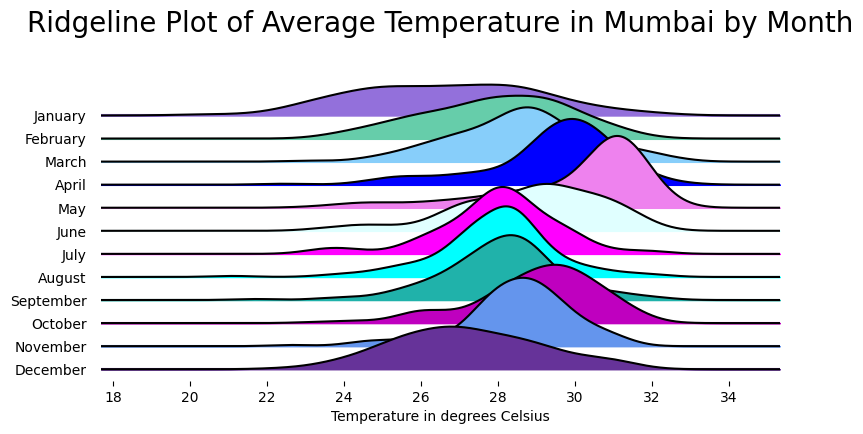

In [7]:
# Plot figure
plt.figure()

# Plot ridgeline
joyplot(data=mumbai[['temp', 'month']], by='month',
        figsize=(8, 4), color=colors)

# Add title and x-axis label
plt.title('Ridgeline Plot of Average Temperature in Mumbai by Month', fontsize=20)
plt.xlabel('Temperature in degrees Celsius')

# Show figure
plt.show()

I choose a ridgeline plot visual encoding because I like the way that a ridgeline plot allows for the distribution to be shown for multiple periods of time (ex: years, months). For the example above, I used a dataset of the weather in Mumbai from the years 2016-2020. I used a basic ridgeline plot to visualize the distribution of the weather (in degrees Celsius) through the years 2016, 2017, 2018, 2019, and 2020. I also created a ridgeline plot for the distribution of weather across each month. This is a fairly simple visualization, but using appropriate channels, such as color, it can definitely show much more complex datasets to show trends and distributions.

## Part 2 - Introduction to Altair

________________________________________________

### Seattle Weather Heatmap Code Explanation
My explanation of how the code is generating the visualization is shown through the comments in the following chunk of code.

In [8]:
# Import necessary libraries
import altair as alt
from vega_datasets import data

# Import data from a URL (over 5,000 rows)
source = data.seattle_temps.url

# Create visualization
alt.Chart( # Create a chart in altair that accepts the data
    source, # Insert the data into the chart
    title="2010 Daily High Temperature (F) in Seattle, WA" # Create a title for the visualization
).mark_rect().encode( # Create a filled rectangle with mark_rect(), set up for encodings
    x='date(date):O', # Create x-axis label and set x-axis
    y='month(date):O', # Create y-axis label and set y-axis
    color=alt.Color('max(temp):Q', # Create color channel as max temp
                    scale=alt.Scale(scheme="inferno")), # Set color scheme
    tooltip=[ # Create interactivity when the cursor moves around the plot
        alt.Tooltip('monthdate(date):T', title='Date'), # Adds Date when cursor is placed on plot
        alt.Tooltip('max(temp):Q', title='Max Temp') # Adds Max Temp when cursor is placed on plot
    ] 
).properties(width=550) # Set width of the chart

alt.Chart(...)

## Part 3 - Visualizing Boston Pollution Data

________________________________________________

In [9]:
# Insert data as dataframes
table3 = pd.read_csv('table3.csv')
table5 = pd.read_csv('table5.csv')
table6 = pd.read_csv('table6.csv')

## Table 3

In [10]:
table3.head()

,Land cover types,Location,Area
0,NWI marine wetlands,Mystic,1298.80
1,Salt marsh,Mystic,46.80
2,Freshwater Wetland,Mystic,94.30
3,City parks,Mystic,1214.70
4,Beach,Mystic,35.25


In [11]:
table3chart = alt.Chart(table3).mark_bar().encode(
    x='Land cover types:N',
    y='Area:Q',
    color='Land cover types:N',
    column='Location:N').properties(title='Land Cover Area by Watershed')

table3chart.configure_title(
    fontSize=20,
    font='Arial',
    anchor='start',
    color='black')

alt.Chart(...)

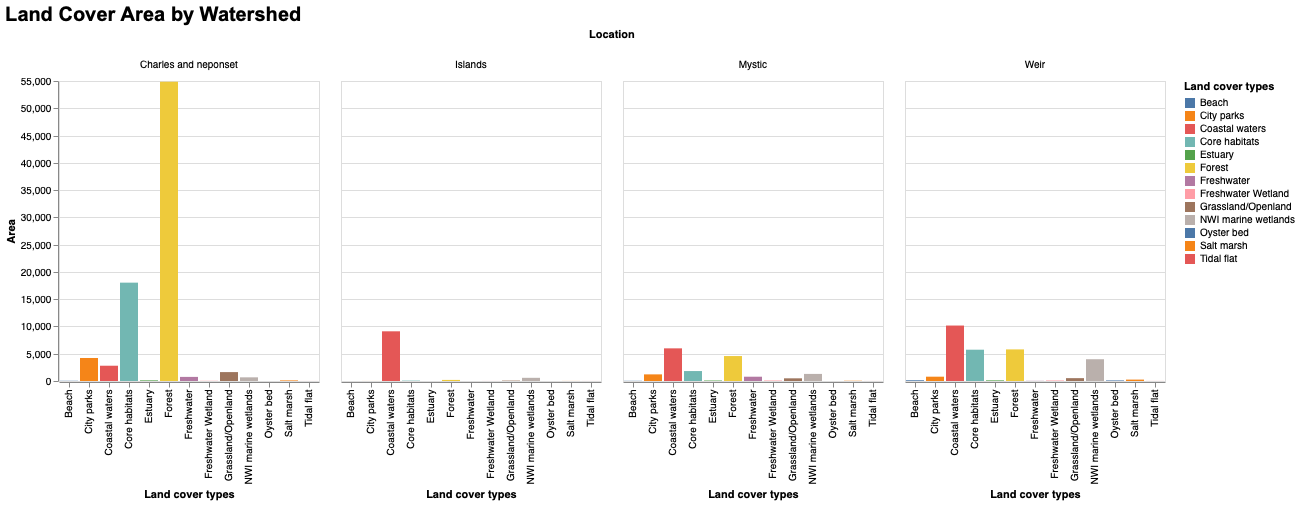

In [12]:
# Display image
Image(filename='table3viz.png') 

This visualization shows the area of each land cover type based on their location. It is evident from this graph that the largest area goes to the 'Forest' land cover in the 'Charles and neponset' location. Based on the color channel, it is easy to see that the 'Charles and neponset' location generally has the largest area for each land cover, and the 'Weir' location generally has the smallest area for each land cover. 

## Table 5

In [13]:
table5.head()

,Land cover types,Level,Value
0,NWI marine wetlands,Low,90367611
1,Salt marsh,Low,5836741
2,Freshwater wetland,Low,7416748
3,City parks,Low,249158682
4,Beach,Low,1748766


In [14]:
table5chart = alt.Chart(table5).mark_bar().encode(
    x='Land cover types:N',
    y='Value:Q',
    color='Land cover types:N',
    column='Level:N').properties(title='Annual Value of Ecosystem Services')

table5chart.configure_title(
    fontSize=20,
    font='Arial',
    anchor='start',
    color='black')

alt.Chart(...)

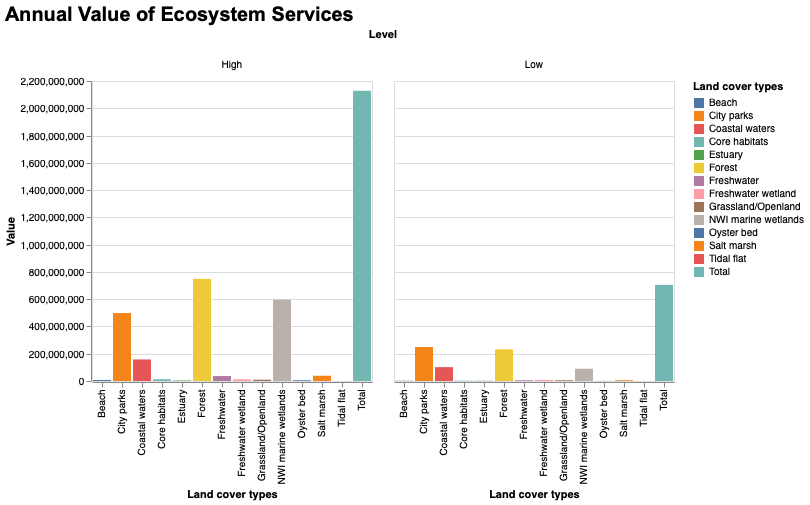

In [15]:
# Display image
Image(filename='table5viz.png') 

This visualization shows the value of each land cover type based on their level (high vs. low). It is evident from this graph that the largest value goes to the 'Forest' land cover in the 'High' level. The 'City parks' and 'NWI marine wetlands' land covers are second and third largest values respectively. The high level generally has larger values than the low level. 

## Table 6

In [16]:
table6.head()

,Cleanup status,Level,Value
0,With cleanup,Low,705209378
1,Without cleanup,Low,489883908
2,Benefit of cleanup,Low,215325469
3,With cleanup,Mid,1416705140
4,Without cleanup,Mid,879715684


In [17]:
table6chart = alt.Chart(table6).mark_bar().encode(
    x='Cleanup status:N',
    y='Value:Q',
    color='Cleanup status:N',
    column='Level:O').properties(title='Annual Value of Ecosystem Services by Cleanup Status')

table6chart.configure_title(
    fontSize=20,
    font='Arial',
    anchor='start',
    color='black')

alt.Chart(...)

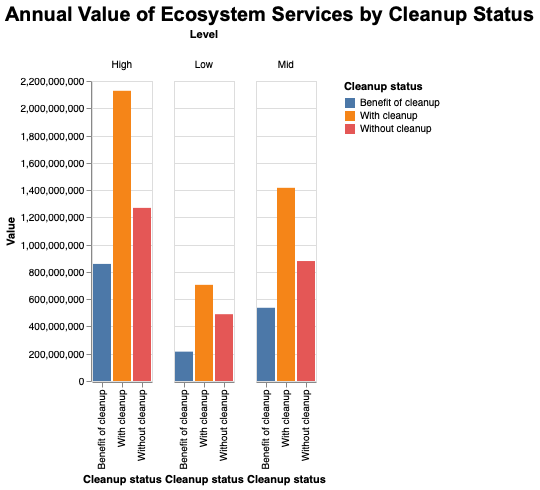

In [18]:
# Display image
Image(filename='table6viz.png') 

This visualization shows the value of each cleanup status based on their level. It is evident from this graph that the largest value goes to the 'With cleanup' status in the 'High' level. Based on the color channel, it is easy to see that the 'With cleanup' status generally has the largest value for each level and the 'Benefit of cleanup' status generally has the smallest value for each level.